Available CSV files:
1: FeatureBagging_10_bezier_baseline.csv
2: FeatureBagging_10_CNN_AE our approach.csv
3: FeatureBagging_10_RNN_AE our approach.csv
4: FeatureBagging_10_bezier_humanlike.csv
5: FeatureBagging_10_RNN_AE conventional.csv
6: FeatureBagging_10_CNN_AE conventional.csv


Plotting scores from FeatureBagging_10_bezier_baseline.csv...


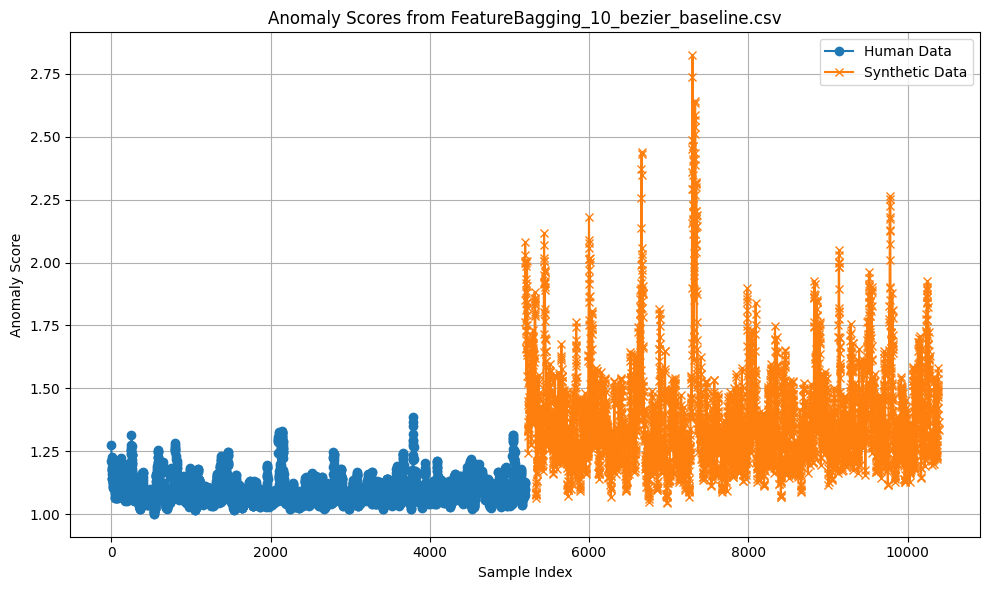

Plotting scores from FeatureBagging_10_CNN_AE our approach.csv...


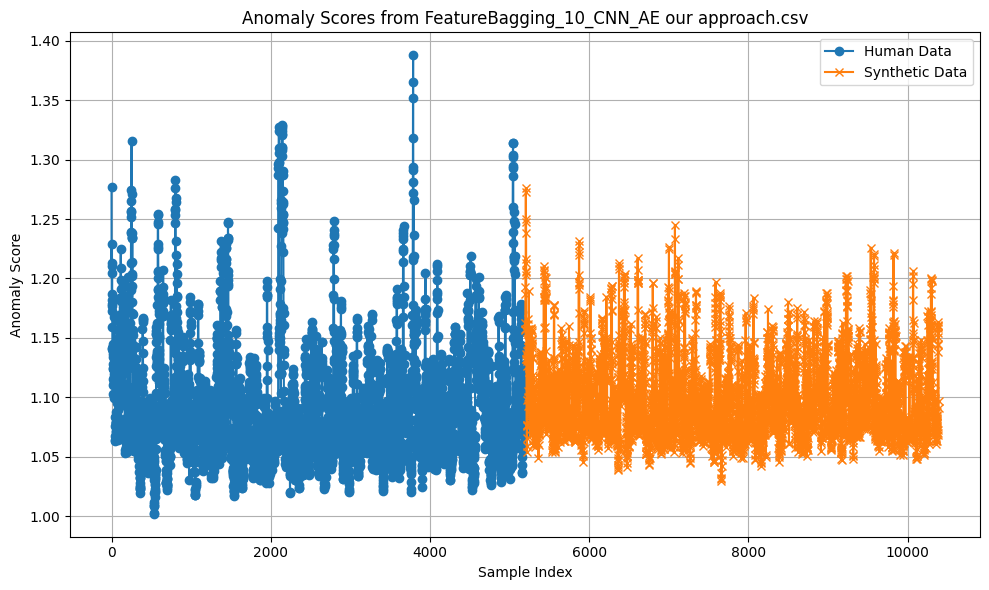

Plotting scores from FeatureBagging_10_RNN_AE our approach.csv...


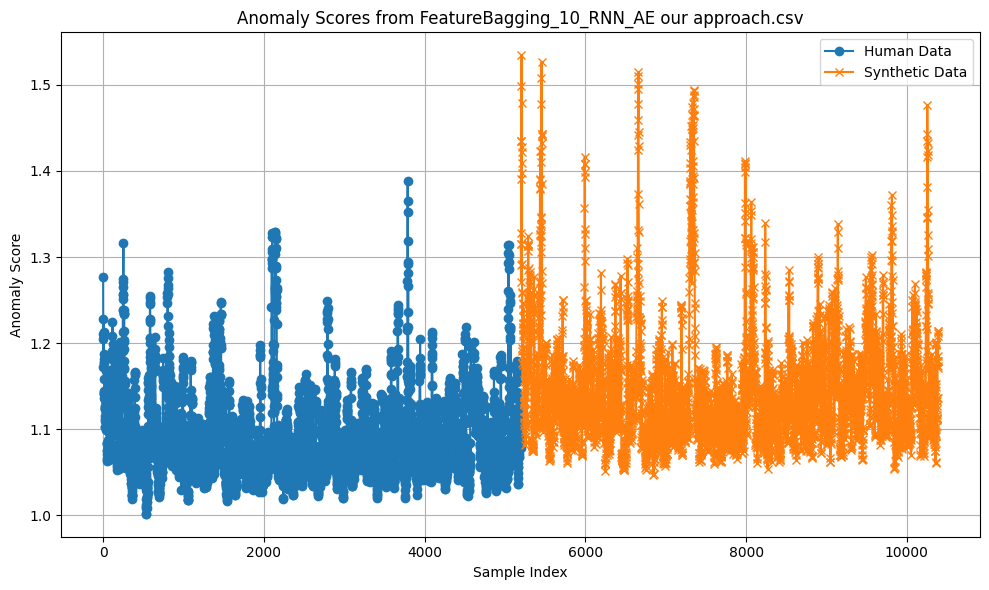

Plotting scores from FeatureBagging_10_bezier_humanlike.csv...


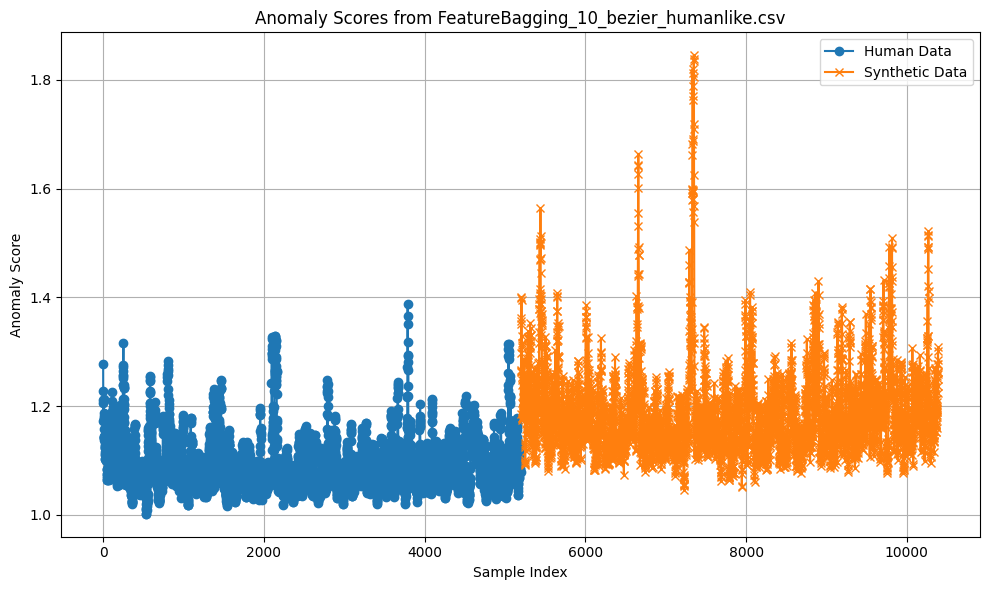

Plotting scores from FeatureBagging_10_RNN_AE conventional.csv...


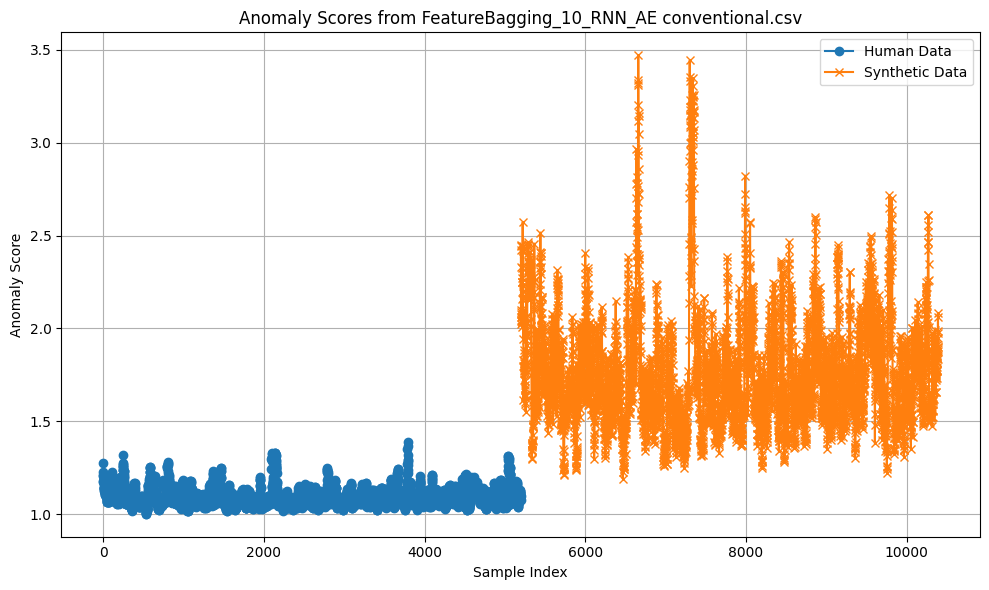

Plotting scores from FeatureBagging_10_CNN_AE conventional.csv...


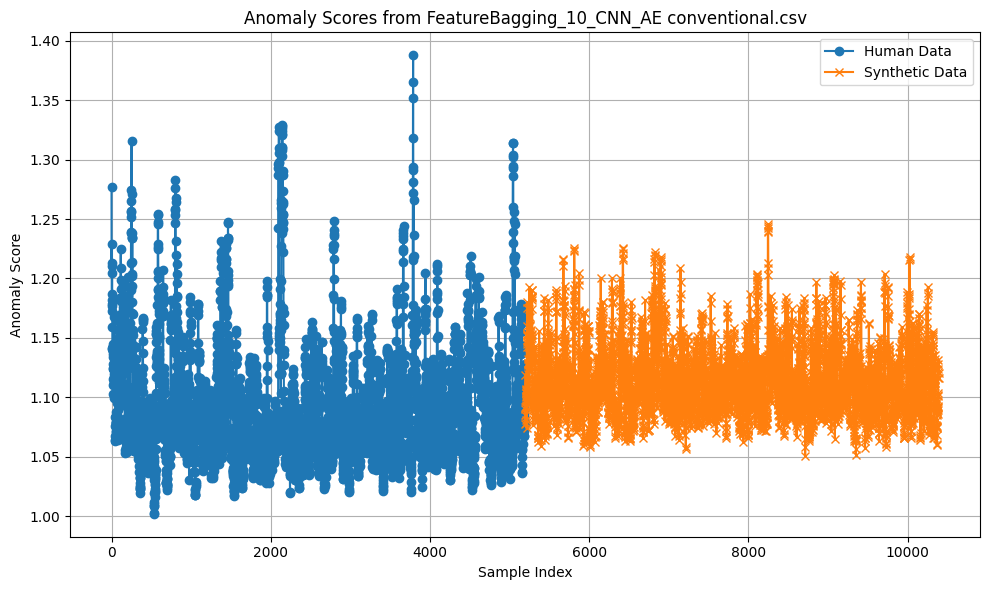

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_scores(csv_file):
    # Read the CSV file with scores and labels
    df = pd.read_csv(csv_file)
    
    # Separate human data (label==0) from synthetic data (label==1)
    human = df[df['label'] == 0]
    synthetic = df[df['label'] == 1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(human.index, human['score'], marker='o', linestyle='-', label='Human Data')
    plt.plot(synthetic.index, synthetic['score'], marker='x', linestyle='-', label='Synthetic Data')
    plt.xlabel('Sample Index')
    plt.ylabel('Anomaly Score')
    plt.title(f'Anomaly Scores from {os.path.basename(csv_file)}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    # Specify the directory containing the CSV files
    csv_dir = 'output_scores'
    if not os.path.exists(csv_dir):
        print(f"Directory '{csv_dir}' does not exist.")
        return

    # List all CSV files in the directory
    csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]
    
    if not csv_files:
        print("No CSV files found in the 'output_scores' directory.")
        return
    
    # Ask user to select a specific CSV file or plot all
    print("Available CSV files:")
    for i, file in enumerate(csv_files):
        print(f"{i + 1}: {file}")
    
    selection = input("Enter the number of the CSV file to plot (or press Enter to plot all): ")
    
    if selection.strip() == "":
        # Plot all CSV files
        for file in csv_files:
            csv_file_path = os.path.join(csv_dir, file)
            print(f"Plotting scores from {file}...")
            plot_scores(csv_file_path)
    else:
        try:
            idx = int(selection) - 1
            if idx < 0 or idx >= len(csv_files):
                print("Invalid selection. Exiting.")
                return
            csv_file_path = os.path.join(csv_dir, csv_files[idx])
            print(f"Plotting scores from {csv_files[idx]}...")
            plot_scores(csv_file_path)
        except ValueError:
            print("Invalid input. Please enter a valid number.")

if __name__ == "__main__":
    main()

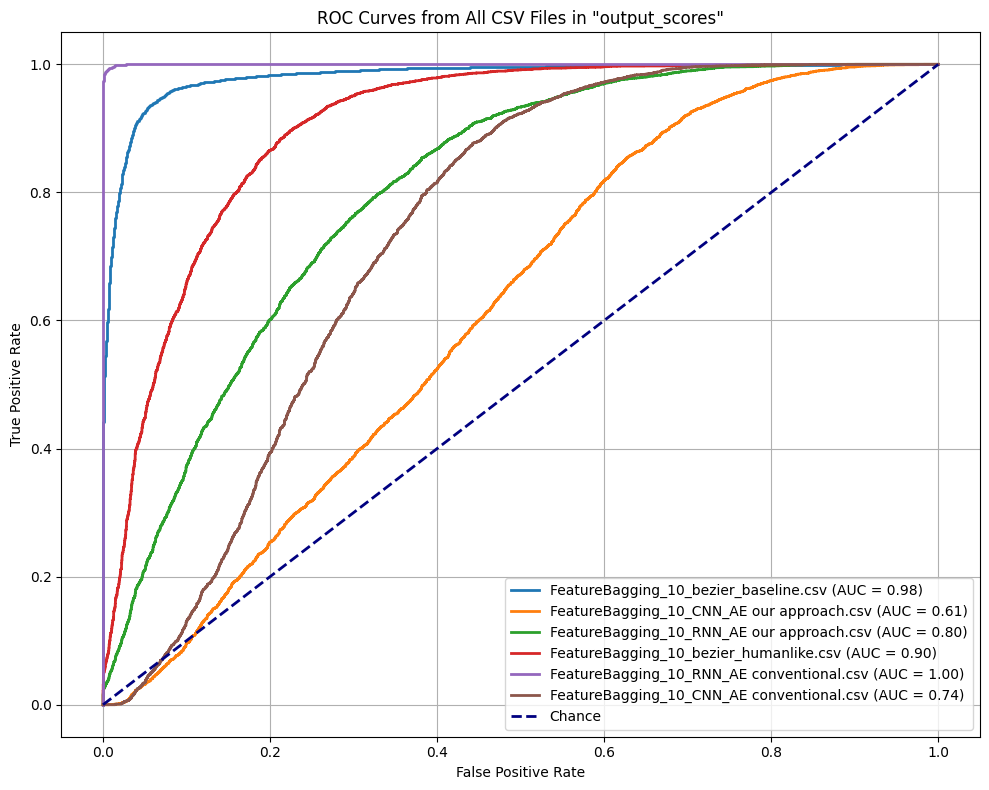

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def compute_roc(csv_file):
    # Read the CSV file with scores and labels
    df = pd.read_csv(csv_file)
    y_true = df['label']
    scores = df['score']
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

def main():
    # Specify the directory containing the CSV files
    csv_dir = 'output_scores'
    if not os.path.exists(csv_dir):
        print(f"Directory '{csv_dir}' does not exist.")
        return

    # List all CSV files in the directory
    csv_files = [file for file in os.listdir(csv_dir) if file.lower().endswith('.csv')]
    if not csv_files:
        print("No CSV files found in the 'output_scores' directory.")
        return

    plt.figure(figsize=(10, 8))
    
    # Process each CSV file and add its ROC curve to the same plot
    for file in csv_files:
        csv_file_path = os.path.join(csv_dir, file)
        fpr, tpr, roc_auc = compute_roc(csv_file_path)
        plt.plot(fpr, tpr, lw=2, label=f'{file} (AUC = {roc_auc:.2f})')
    
    # Plot the chance line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves from All CSV Files in "output_scores"')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()